# FrontMatter Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [3]:
%cd ./PHD/FA19/HTRC/ht-frontmatter-analysis/

/content/drive/My Drive/PHD/FA19/HTRC/ht-frontmatter-analysis


In [0]:
!git remote set-url origin https://github.com/nikolausn/ht-frontmatter-analysis

In [0]:
!git add book-segmentation/

In [0]:
import pandas as pd

In [0]:
# read dataset
x_all = pd.read_csv("./data/java_training_data.csv",sep=" ")

In [8]:
x_all.head()

,volume,seq,log_seq,squared_seq,pct_seq,token_count,token_count_normalized,line_count,empty_line_count,empty_line_count_normalized,cap_alpha_seq,pct_begin_char_caps,pct_end_char_numeric,num_roman_numerals,pct_all_caps,target
0,aeu.ark+=13960=t9d51x63d,1.0,0.000000,1.0,0.023810,67.0,-0.599705,69.0,36.0,1.175258,4.0,0.272727,0.121212,0.0,0.567164,open
1,aeu.ark+=13960=t9d51x63d,2.0,0.693147,4.0,0.047619,24.0,-0.895092,14.0,5.0,-0.755819,3.0,0.444444,0.000000,0.0,0.208333,open
2,aeu.ark+=13960=t9d51x63d,3.0,1.098612,9.0,0.071429,437.0,1.941999,140.0,54.0,2.296528,4.0,0.162791,0.011628,6.0,0.070938,open
3,aeu.ark+=13960=t9d51x63d,4.0,1.386294,16.0,0.095238,423.0,1.845826,79.0,15.0,-0.132891,3.0,0.093750,0.031250,0.0,0.047281,open
4,aeu.ark+=13960=t9d51x63d,5.0,1.609438,25.0,0.119048,6.0,-1.018742,4.0,2.0,-0.942698,1.0,0.500000,0.000000,0.0,0.833333,open


In [0]:
import sklearn

In [0]:
target_classes = x_all.target.unique().tolist()

In [0]:
x_all["target_class"] = x_all.target.apply(lambda x: target_classes.index(x))

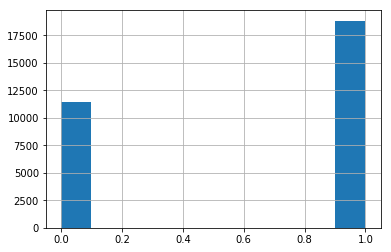

In [12]:
x_all.target_class.hist()

In [0]:
X = x_all.iloc[:,1:-2]
y = x_all.iloc[:,-1]

In [0]:
# split training and testing
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
# Import metrics for computing accuracy
from sklearn import metrics

## LDA

In [0]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train)  

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [0]:
y_hat = clf_lda.predict(X_test)
metrics.accuracy_score(y_test,y_hat)
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2289
           1       0.89      0.94      0.91      3765

    accuracy                           0.89      6054
   macro avg       0.89      0.87      0.88      6054
weighted avg       0.89      0.89      0.89      6054



## SVM

In [0]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto')
clf_svm.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_hat = clf_svm.predict(X_test)
metrics.accuracy_score(y_test,y_hat)
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79      2289
           1       0.83      0.98      0.90      3765

    accuracy                           0.87      6054
   macro avg       0.89      0.83      0.85      6054
weighted avg       0.88      0.87      0.86      6054



## SVC, with linear kernel

In [0]:
from sklearn.svm import LinearSVC
clf_svm_linear = LinearSVC(random_state=0, tol=1e-6,max_iter=10000)
clf_svm_linear.fit(X_train, y_train)  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-06,
          verbose=0)

In [0]:
y_hat = clf_svm_linear.predict(X_test)
metrics.accuracy_score(y_test,y_hat)
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2289
           1       0.90      0.90      0.90      3765

    accuracy                           0.88      6054
   macro avg       0.87      0.87      0.87      6054
weighted avg       0.88      0.88      0.88      6054



## Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=5,
                              random_state=0)
clf_rf.fit(X_train, y_train)  
print(clf_rf.feature_importances_)

[0.07738465 0.13968316 0.11187421 0.05109282 0.15979522 0.18530949
 0.06567441 0.01310281 0.01269114 0.0124439  0.03978442 0.05333825
 0.0029473  0.07487823]


In [0]:
y_hat = clf_rf.predict(X_test)
metrics.accuracy_score(y_test,y_hat)
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2289
           1       0.94      0.96      0.95      3765

    accuracy                           0.93      6054
   macro avg       0.93      0.93      0.93      6054
weighted avg       0.93      0.93      0.93      6054



## Stochastic Gradient Descent

In [0]:
from sklearn import linear_model
clf_sgd = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf_sgd.fit(X_train, y_train)  


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_hat = clf_sgd.predict(X_test)
metrics.accuracy_score(y_test,y_hat)
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      2289
           1       0.86      0.95      0.90      3765

    accuracy                           0.87      6054
   macro avg       0.88      0.85      0.86      6054
weighted avg       0.88      0.87      0.87      6054



## Cross validaton following the Miles Efron workflow
```
n = c(100, 250, 500, 1000, 2500, 5000, 7500, 10000, 15000, 24214)
a.lr  = vector()
a.svm = vector()
a.rf  = vector()

for(i in 1:length(n)) {
	print(i)
	x.sample = x.train[sample(nrow(x.train), n[i]),]
	fit.lr  = train(target~., data=x.sample, method="glm", family="binomial", metric=metric, trControl=control)
	fit.svm = train(target~., data=x.sample, method="svmRadial", metric=metric, trControl=control)
	fit.rf  = train(target~., data=x.sample, method="rf", metric=metric, trControl=control)
	predictions = predict(fit.lr, x.test)
	cm = confusionMatrix(predictions, x.test$target)
	a.lr[i] = as.numeric(cm[3]$overall[1])
	
	predictions = predict(fit.svm, x.test)
	cm = confusionMatrix(predictions, x.test$target)
	a.svm[i] = as.numeric(cm[3]$overall[1])
	
	predictions = predict(fit.rf, x.test)
	cm = confusionMatrix(predictions, x.test$target)
	a.rf[i] = as.numeric(cm[3]$overall[1])
}
```



In [0]:
import random

In [22]:
random.sample(range(1,10),1)

[2]

In [23]:
len(X_train)

24212

In [53]:
X_train.shape

(24212, 14)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import  SVC
from sklearn.ensemble import RandomForestClassifier
import random

n_list = [100, 250, 500, 1000, 2500, 5000, 7500, 10000, 15000, len(X_train)]
output_result = []
for x in n_list:
  # get sample  
  train_index = random.sample(range(len(X_train)),x) 
  # svm
  clf_svm = SVC(gamma='auto')
  clf_svm.fit(X_train.iloc[train_index,:], y_train.iloc[train_index]) 
  y_hat = clf_svm.predict(X_test)
  acc = metrics.accuracy_score(y_test,y_hat) 
  svm_out = {"type":"svm","n": x, "model": clf_svm,"acc": acc}
  output_result.append(svm_out)
  # logistic regression
  clf_lr = LogisticRegression()
  clf_lr.fit(X_train.iloc[train_index,:], y_train.iloc[train_index])  
  y_hat = clf_lr.predict(X_test)
  acc = metrics.accuracy_score(y_test,y_hat) 
  lr_out = {"type":"lr","n":x,"model": clf_lr,"acc": acc}
  output_result.append(lr_out)
  # random foreset
  clf_rf = RandomForestClassifier(n_estimators=100, max_depth=5,
                              random_state=0)
  clf_rf.fit(X_train.iloc[train_index,:], y_train.iloc[train_index])  
  y_hat = clf_rf.predict(X_test)
  acc = metrics.accuracy_score(y_test,y_hat) 
  rf_out = {"type":"rf","n":x,"model": clf_rf,"acc": acc}
  output_result.append(rf_out)

  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [57]:
output_df = pd.DataFrame(output_result)
output_df

,acc,model,n,type
0,0.738190,"SVC(C=1.0, cache_size=200, class_weight=None, ...",100,svm
1,0.883878,"LogisticRegression(C=1.0, class_weight=None, d...",100,lr
2,0.901883,"(DecisionTreeClassifier(class_weight=None, cri...",100,rf
3,0.761480,"SVC(C=1.0, cache_size=200, class_weight=None, ...",250,svm
4,0.880740,"LogisticRegression(C=1.0, class_weight=None, d...",250,lr
5,0.918731,"(DecisionTreeClassifier(class_weight=None, cri...",250,rf
6,0.794020,"SVC(C=1.0, cache_size=200, class_weight=None, ...",500,svm
7,0.886026,"LogisticRegression(C=1.0, class_weight=None, d...",500,lr
8,0.919557,"(DecisionTreeClassifier(class_weight=None, cri...",500,rf
9,0.810373,"SVC(C=1.0, cache_size=200, class_weight=None, ...",1000,svm


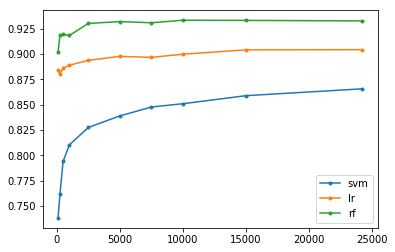

In [64]:
from matplotlib import pyplot as plt
plt.plot(output_df[output_df["type"]=="svm"].n,output_df[output_df["type"]=="svm"].acc,'.-',label="svm")
plt.plot(output_df[output_df["type"]=="lr"].n,output_df[output_df["type"]=="lr"].acc,'.-',label="lr")
plt.plot(output_df[output_df["type"]=="rf"].n,output_df[output_df["type"]=="rf"].acc,'.-',label="rf")
plt.legend()

# New approach using extracted features (EF)

## Download the EF volume on the testing set using EF_HTRC python library

In [0]:
!pip install htrc-feature-reader

     |████████████████████████████████| 194kB 4.3MB/s 
     |████████████████████████████████| 215kB 41.9MB/s 
  Created wheel for htrc-feature-reader: filename=htrc_feature_reader-1.99-cp36-none-any.whl size=13605 sha256=e9126c2f14373e3767d4ef51fd1021896296a0d54c09432d582f85f24ceebbf2
  Stored in directory: /root/.cache/pip/wheels/4f/18/43/63eb2e1e2e0a169866c024e84c44cdd23ad0507d27c3c6b2e9
  Created wheel for ujson: filename=ujson-1.35-cp36-cp36m-linux_x86_64.whl size=68036 sha256=3253e675c6fb97bdb9aa9f108fb8400a2c516f3f30e830cba9ad458b005aa314
  Stored in directory: /root/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
  Created wheel for pymarc: filename=pymarc-3.1.13-cp36-none-any.whl size=145759 sha256=a02a521d96a8eeccd913d96a4faee2c0b95e63b55480b51caae34031e6fbac4b
  Stored in directory: /root/.cache/pip/wheels/94/ab/33/6cc81cb18d16cc4704c9fd6e11636cae7f99660cb4a7361e62
Successfully built htrc-feature-reader ujson pymarc


In [0]:
import urllib.parse

urllib.parse.quote("aeu.ark+=13960=t9d51x63d")

'aeu.ark%2B%3D13960%3Dt9d51x63d'

In [0]:
vol_ids = [urllib.parse.quote(x) for x in x_all.volume.unique()]

In [0]:
from htrc_features import FeatureReader
#ef_list = []
#for vol_id in x_all.volume.unique():
fr = FeatureReader(ids=vol_ids)


In [0]:
#ef_list = list(fr)

In [0]:
!pip install jsonpickle

In [0]:
import jsonpickle

## Save the EF in a json file

In [0]:
"""
with open("ef-vols.json","w") as file:
  for vol in fr:
    print(vol.id)
    file.write(jsonpickle.dumps(vol)+"\n")
"""

'\nwith open("ef-vols.json","w") as file:\n  for vol in fr:\n    print(vol.id)\n    file.write(jsonpickle.dumps(vol)+"\n")\n'

## Read EF Json File

In [0]:
x_all.head()

,volume,seq,log_seq,squared_seq,pct_seq,token_count,token_count_normalized,line_count,empty_line_count,empty_line_count_normalized,cap_alpha_seq,pct_begin_char_caps,pct_end_char_numeric,num_roman_numerals,pct_all_caps,target,target_class
0,aeu.ark+=13960=t9d51x63d,1.0,0.000000,1.0,0.023810,67.0,-0.599705,69.0,36.0,1.175258,4.0,0.272727,0.121212,0.0,0.567164,open,0
1,aeu.ark+=13960=t9d51x63d,2.0,0.693147,4.0,0.047619,24.0,-0.895092,14.0,5.0,-0.755819,3.0,0.444444,0.000000,0.0,0.208333,open,0
2,aeu.ark+=13960=t9d51x63d,3.0,1.098612,9.0,0.071429,437.0,1.941999,140.0,54.0,2.296528,4.0,0.162791,0.011628,6.0,0.070938,open,0
3,aeu.ark+=13960=t9d51x63d,4.0,1.386294,16.0,0.095238,423.0,1.845826,79.0,15.0,-0.132891,3.0,0.093750,0.031250,0.0,0.047281,open,0
4,aeu.ark+=13960=t9d51x63d,5.0,1.609438,25.0,0.119048,6.0,-1.018742,4.0,2.0,-0.942698,1.0,0.500000,0.000000,0.0,0.833333,open,0


In [0]:
volume_all = x_all.volume.unique()

In [0]:
#--- no need to run this because we created the extracted features dataframe
all_ef = []
with open("ef-vols.json","r") as file:
  i = 0
  for line in file:
    #print(line)
    test = jsonpickle.loads(line)
    #all_ef.append(test)
    all_pages = list(test.pages())
    # check the sequence on the dataset
    for page in x_all[x_all.volume==volume_all[i]].seq.values:
      # seq start from 1, pages index processor start from 0
      all_ef.append((i,int(page),all_pages[int(page)-1].tokenlist()))
    i+=1
    #break


In [0]:
?pickle dumps

In [0]:
# save as pickle binary
--- only used first time
import pickle
with open("selected_ef.pickle","wb") as file:
  pickle.dump(all_ef,file)

SyntaxError: ignored

In [0]:
# read pickle binary 
import pickle
with open("selected_ef.pickle","rb") as file:
  all_ef = pickle.load(file)

In [0]:
all_ef_pd = pd.DataFrame(all_ef,columns=["doc_id","page","features"])

In [0]:
all_ef_pd.head()

,doc_id,page,features
0,0,1,count page sec...
1,0,2,count p...
2,0,3,count page sect...
3,0,4,count page se...
4,0,5,count page sect...


## get all unique features from the ef to build a feature set and term frequency matrix

In [0]:
feature_dict = {}
index = 0
for ef in all_ef_pd.features.values:
  for x in ef.reset_index().token.values:
    try:
      feature_dict[x]
    except:
      feature_dict[x] = index
      index+=1

In [0]:
# total features
total_features = len(feature_dict.keys())
total_features

435814

## make a term frequency matrix for each page, using sparse matrix because it will consume too much memory if we fit all the data in a regular matrix form

In [0]:
from scipy.sparse import lil_matrix

In [0]:
term_matrix = lil_matrix((x_all.shape[0],total_features))
for i,ef in enumerate(all_ef_pd.features.values):
  for x in ef.reset_index().values:
    #print(x[2])
    term_matrix[i,feature_dict[x[2]]] = x[4]
    #break
  #break
  #term_matrix[i,feature_dict[x]] = 

In [0]:
term_matrix.shape

(30266, 435814)

In [0]:
#term_matrix[:,:]

In [0]:
# split training and testing
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(7)
X_train, X_test, train_index, test_index = train_test_split(X, range(len(y)), test_size=0.20)

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
sgd_classifier = SGDClassifier()

In [0]:
term_matrix[train_index,:].shape

(24212, 435814)

In [0]:
term_matrix[test_index,:].shape

(6054, 435814)

In [0]:
sgd_classifier.fit(term_matrix[train_index,:],x_all.loc[train_index,:].target_class)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_hat = sgd_classifier.predict(term_matrix[test_index,:])

In [0]:
metrics.accuracy_score(x_all.loc[test_index,:].target_class,y_hat)
print(metrics.classification_report(x_all.loc[test_index,:].target_class,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2311
           1       0.96      0.94      0.95      3743

    accuracy                           0.93      6054
   macro avg       0.93      0.93      0.93      6054
weighted avg       0.94      0.93      0.93      6054



### What is actually happening here?

In [0]:
term_matrix

<30266x435814 sparse matrix of type '<class 'numpy.float64'>'
	with 3853035 stored elements in LInked List format>

In [0]:
# index to word
id_to_word = {}
for key,val in feature_dict.items():
  id_to_word[val] = key

In [0]:
len(id_to_word)

435814

In [0]:
term_matrix.shape[0]

30266

In [0]:
# sum the frequency to get number of term counts on the dataset
term_counts = np.array(term_matrix.sum(axis=0))[0]
term_counts.shape

(435814,)

In [0]:
word_index_sorted = np.argsort(term_counts)[::-1]
word_index_sorted.shape

(435814,)

In [0]:
# remove stop words from the list
from nltk.corpus import stopwords 
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
filter_features = {}
for x in all_features:
  if x.isalpha() and x.lower() not in stop_words:
    filter_features[x] = True

let us check the top 20 words

In [0]:
word_index_sort_filter = []
for x in word_index_sorted:
  try:
    #print(feature_dict[])
    filter_features[id_to_word[x]]
    word_index_sort_filter.append(x)
  except:
    continue

In [0]:
word_index_sort_filter[:10]

[1101, 280, 2565, 1131, 1264, 2928, 4083, 1130, 1542, 2659]

In [0]:
all_features = list(feature_dict.keys())

In [0]:
pd.DataFrame(list(zip([id_to_word[x] for x in word_index_sort_filter[:30]],[term_counts[x] for x in word_index_sort_filter[:30]])),columns=["term","frequency"])


,term,frequency
0,one,11703.0
1,may,10798.0
2,would,9334.0
3,upon,8652.0
4,time,7595.0
5,great,6836.0
6,shall,6154.0
7,two,6091.0
8,made,5803.0
9,every,5461.0


### It looks like the dataset contains a huge bias on the

# Topic Modeling for mixed class

In [0]:
?lda

Object `lda` not found.


In [0]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

# Create a corpus from a list of texts
common_dictionary = Dictionary(common_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]

In [0]:
common_corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

In [0]:
common_dictionary.save_as_text("test.txt")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
term_matrix_filter = lil_matrix((x_all.shape[0],total_features))
for i,ef in enumerate(all_ef_pd.features.values):
  for x in ef.reset_index().values:
    try:
      # assert the word to eleminate stop words and other non alphabetic feature
      filter_features[x[2]]
      term_matrix_filter[i,feature_dict[x[2]]] = x[4]
    except:
      continue
    #break
  #break
  #term_matrix[i,feature_dict[x]] = 

In [0]:
with open("dictionary.txt","w") as file:
  file.write("{}\n".format(len(feature_dict)))
  for key,val in feature_dict.items():
    file.write("{}\t{}\t{}\n".format(val,key,0))

In [0]:
test = term_matrix_filter.asformat("csr")

In [0]:
test[0].data

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [0]:
test[0].indices

array([20, 21, 22, 23, 24, 25, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 50, 51, 52, 53], dtype=int32)

In [0]:
corpus = []
for i,x in enumerate(range(test.shape[0])):
  corpus.append(list(zip(test[i].indices,test[i].data)))
      

In [0]:
corpus[0]

[(20, 1.0),
 (21, 1.0),
 (22, 1.0),
 (23, 1.0),
 (24, 1.0),
 (25, 1.0),
 (29, 1.0),
 (31, 1.0),
 (33, 1.0),
 (36, 1.0),
 (37, 1.0),
 (38, 1.0),
 (39, 1.0),
 (40, 1.0),
 (41, 1.0),
 (42, 1.0),
 (43, 1.0),
 (44, 1.0),
 (50, 1.0),
 (51, 1.0),
 (52, 1.0),
 (53, 1.0)]

In [0]:
import gensim

# Creating the object for LDA model using gensim library
lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = lda(corpus = corpus, num_topics=50, id2word=id_to_word)

In [0]:
ldamodel.show_topics(num_topics=20,num_words=15)

[(49,
  '0.016*"may" + 0.015*"SU" + 0.014*"possible" + 0.013*"pages" + 0.009*"image" + 0.009*"Pages" + 0.009*"filming" + 0.008*"qui" + 0.008*"se" + 0.007*"Couverture" + 0.007*"checked" + 0.007*"de" + 0.007*"material" + 0.007*"copy" + 0.006*"que"'),
 (36,
  '0.019*"bres" + 0.013*"et" + 0.010*"ad" + 0.007*"ri" + 0.007*"Michel" + 0.006*"gages" + 0.005*"de" + 0.005*"cum" + 0.005*"per" + 0.004*"ab" + 0.004*"tentative" + 0.004*"quae" + 0.004*"JAMES" + 0.004*"est" + 0.004*"Silo"'),
 (15,
  '0.026*"shall" + 0.008*"time" + 0.008*"year" + 0.007*"General" + 0.006*"court" + 0.005*"Corps" + 0.005*"king" + 0.005*"Council" + 0.005*"March" + 0.005*"granted" + 0.004*"Governor" + 0.004*"order" + 0.004*"upon" + 0.004*"Committee" + 0.004*"appointed"'),
 (2,
  '0.030*"equations" + 0.016*"Buffalo" + 0.016*"Direct" + 0.014*"Lettering" + 0.012*"gravity" + 0.010*"equation" + 0.009*"unit" + 0.008*"Continuity" + 0.007*"corresponding" + 0.007*"Similarly" + 0.007*"Formal" + 0.006*"efficiency" + 0.006*"downward" + 

In [0]:
!pip install pyldavis

     |████████████████████████████████| 1.6MB 2.7MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=d7055440146b6835c1160cd3710c16c8830c6347051d11f9a5edd2cd453d3f11
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [0]:
diction = gensim.corpora.Dictionary.load_from_text("dictionary.txt")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
diction

In [0]:
import pyLDAvis
pyLDAvis.enable_notebook()


In [0]:
test_tt[1]

count
page section token              pos         
2    body    (                  -LRB-      2
             )                  -RRB-      2
             /                  NNP        1
             CIHM               NNP        1
             Canadian           JJ         1
                                NNP        1
             Collection         NNP        1
             Historical         NNP        1
             ICMH               NNP        1
             IMonographs        NNP        1
             InstHut            NNP        1
             InstHuta           NNP        1
             Microfiche         NNP        1
             Microroproductions NNP        1
             Mstoriquaa         .          1
             Series             NNP        1
             da                 NN         1
             de                 IN         1
             for                IN         1
             microfiches        NNS        1
             microraproductiona NN         1
             monographies       NNS        1